# № 1.1.6

In [75]:
import matplotlib.pyplot as plt
true_val = 6

In [76]:
def a(n):
    return 72 / ( 5 * (n**2 + 6*n + 8))

In [77]:
N_val = [10, 100, 1000, 10000, 100000]
d_n = []
right_numbers = []

In [78]:
def S(N):
    Sum = 0
    for i in range (N+1):
        Sum += a(i)
    return Sum

In [79]:
for N in N_val:
    series = S(N)
    abs_err = abs(true_val - series)
    right_number = 0
    i = 1
    while i > -10: 
        if abs_err <= 10**i:
            i -= 1
            right_number += 1
        else: 
            break
    d_n.append(abs_err)
    right_numbers.append(right_number)

    print("N = ", N)
    print("Partial Sum = ", series)
    print("Abs Error = ", abs_err)
    print("Number of right nums = ", right_number)
    print("\n")

N =  10
Partial Sum =  4.931868131868131
Abs Error =  1.0681318681318688
Number of right nums =  1


N =  100
Partial Sum =  5.8608663181478695
Abs Error =  0.1391336818521305
Number of right nums =  2


N =  1000
Partial Sum =  5.985650220652795
Abs Error =  0.014349779347204716
Number of right nums =  3


N =  10000
Partial Sum =  5.998560503820113
Abs Error =  0.0014394961798869232
Number of right nums =  4


N =  100000
Partial Sum =  5.999856005039885
Abs Error =  0.0001439949601147461
Number of right nums =  5




In [95]:
right_digits = right_numbers[0:5]

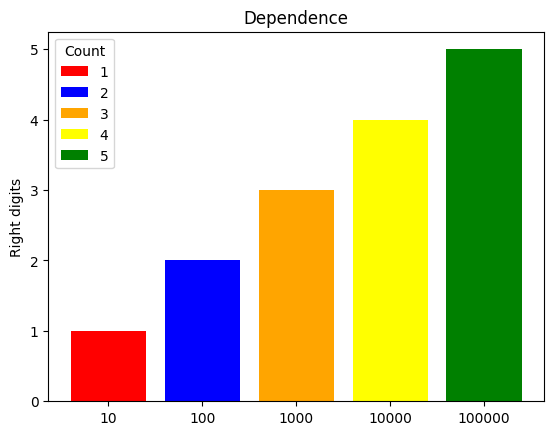

In [105]:
fig, ax = plt.subplots()

bar_labels = ['1', '2', '3', '4', '5']
bar_colors = ['red','blue','orange','yellow','green']
ax.bar(['10', '100', '1000', '10000', '100000'], right_digits, label = bar_labels, color = bar_colors )

ax.set_ylabel('Right digits')
ax.set_title('Dependence')
ax.legend(title='Count')

plt.show()

# № 1.3.2

In [112]:
import numpy as np
from numpy import linalg
matrix = np.array([ 
            [2,  4.4,  -2], 
            [1, 2, -1],
            [3, -5, 0 ]
                        ])

In [114]:
matrix

array([[ 2. ,  4.4, -2. ],
       [ 1. ,  2. , -1. ],
       [ 3. , -5. ,  0. ]])

In [113]:
linalg.inv(matrix)

array([[  4.16666667,  -8.33333333,   0.33333333],
       [  2.5       ,  -5.        ,   0.        ],
       [  9.16666667, -19.33333333,   0.33333333]])

In [255]:
matrix_changed = matrix.copy()
matrix_changed[0, 0] *= 0.9

In [256]:
linalg.inv(matrix_changed)

array([[  25.,  -50.,    2.],
       [  15.,  -30.,    1.],
       [  55., -111.,    4.]])

In [257]:
linalg.det(matrix_changed)

-0.20000000000000548

такая погрешность может сделать матрицу вырожденной

# № 1.7

In [253]:
types = {
    'float': np.single,
    'double': np.double,
    'long double': np.longdouble,
}


def find_precision(type):
    k: int = 0
    number_type = types[type]
    number = number_type(1)
    while number != 0:
        number = number_type(number / 2)
        k += 1
    print(f"Machine zero for {type} = 2^-{k}")
    k = 0
    number = number_type(1)
    while number != np.inf:
        number = number_type(number * 2)
        k += 1
    print(f"Machine infinity for {type} = 2^{k}")
    k = 0
    number = number_type(1)
    while number_type(1.) + number > number_type(1.):
        number = number_type(number / 2)
        k += 1
    print(f"Machine epsilon for {type} = 2^-{k}")

    
for typename in types.keys():
    print()
    find_precision(typename)


Machine zero for float = 2^-150
Machine infinity for float = 2^128
Machine epsilon for float = 2^-24

Machine zero for double = 2^-1075
Machine infinity for double = 2^1024
Machine epsilon for double = 2^-53

Machine zero for long double = 2^-1075
Machine infinity for long double = 2^1024
Machine epsilon for long double = 2^-53


/var/folders/54/8zj8sdk545x43jggjff_d2hc0000gn/T/ipykernel_79972/4262025652.py:19: RuntimeWarning: overflow encountered in cast
  number = number_type(number * 2)
/var/folders/54/8zj8sdk545x43jggjff_d2hc0000gn/T/ipykernel_79972/4262025652.py:19: RuntimeWarning: overflow encountered in scalar multiply
  number = number_type(number * 2)


# №1.10.6

In [180]:
vect = np.array([
    [9, 17, 1],
    [27, 35, -18],
    [6, 14, 4]
])

In [181]:
linalg.det(vect)

23.999999999999908

Так как определитель ненулевой, то векторы неколлинеарны 

In [182]:
alpha = 0.005
beta = 0.001
gamma = 1

In [239]:
def with_error(number, delta):
    array = np.empty((3, 3), dtype=float)
    for i in range(3):
        for j in range(3):
            if number & 1 == 0:
                array[i, j] = matrix[i, j] * (1 + delta)
            else:
                array[i, j] = matrix[i, j] * (1 - delta)
            number = number >> 1
    return array

In [247]:
def checkout(min_det, max_det):
    if max_det < 0 or min_det > 0:
        return "Not Coplanar"
    elif min_det <= 0 <= max_det:
        return "Uncertain"
    else:
        return "Coplanar"

In [249]:
results_alpha = np.empty(2**9)
for number in range(2**9):
    results_alpha[number] = np.linalg.det(with_error(number, alpha))
    
m = np.min(results_alpha)
M = np.max(results_alpha)

print(checkout(m, M))
print('alpha = 0.5% ')
print('Matrix determinant from', m, 'to', M)

Not Coplanar
alpha = 0.5% 
Matrix determinant from -1.6602901499999942 to -0.7422898500000024


In [250]:
results_beta = np.empty(2**9)
for number in range(2**9):
    results_beta[number] = np.linalg.det(with_error(number, beta))
    
m = np.min(results_beta)
M = np.max(results_beta)

print(checkout(m, M))
print('beta = 0.1% ')
print('Matrix determinant from', m, 'to', M)

Not Coplanar
beta = 0.1% 
Matrix determinant from -1.2916916011999962 to -1.1084115988000067


In [251]:
results_gamma = np.empty(2**9)
for number in range(2**9):
    results_gamma[number] = np.linalg.det(with_error(number, gamma))
    
m = np.min(results_gamma)
M = np.max(results_gamma)

print(checkout(m, M))
print('gamma = 100% ')
print('Matrix determinant from', m, 'to', M)

Uncertain
gamma = 100% 
Matrix determinant from -185.6 to 176.00000000000009
